In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from rich.progress import track
import os
import cv2
import numpy as np

# 1. Load and preprocess images
data_dir = "./UTKFace"
print("Loading and preprocessing images...")
X, y = [], []

# Use Rich progress bar
file_list = os.listdir(data_dir)
for file in track(file_list, description="Processing images..."):
    try:
        gender = int(file.split('_')[1])  # 0 = male, 1 = female
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        X.append(img)
        y.append(gender)
    except:
        continue

X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

Processing images... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:02:16

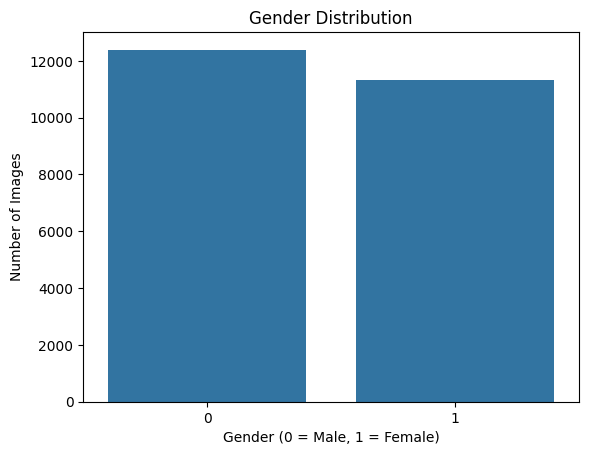

In [3]:
# 2. Visualize gender distribution
sns.countplot(x=y)
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Number of Images")
plt.show()

Displaying sample images...


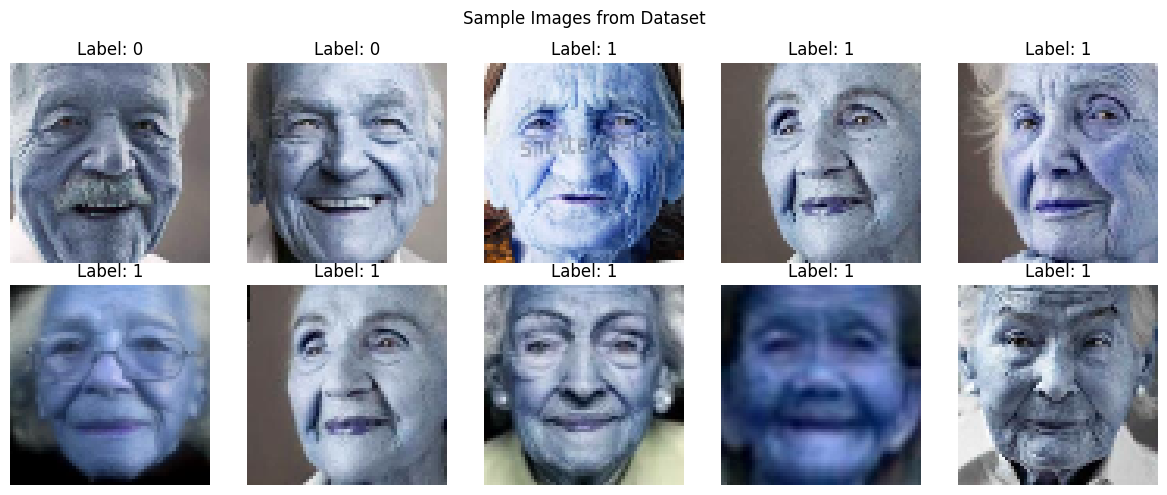

In [4]:
# 3. Visualize sample images
print("Displaying sample images...")
y_onehot = to_categorical(y, 2)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i])
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Sample Images from Dataset")
plt.tight_layout()
plt.show()

In [5]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [6]:
# 5. Build CNN model
print("Building model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Building model...


C:\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 6. Train model
print("Training model...")
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=1)

Training model...
Epoch 1/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 52s 91ms/step - accuracy: 0.7653 - loss: 0.4855 - val_accuracy: 0.8708 - val_loss: 0.2994
Epoch 2/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 87s 101ms/step - accuracy: 0.8722 - loss: 0.2975 - val_accuracy: 0.8851 - val_loss: 0.2713
Epoch 3/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 48s 89ms/step - accuracy: 0.8846 - loss: 0.2606 - val_accuracy: 0.8777 - val_loss: 0.2838
Epoch 4/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 48s 89ms/step - accuracy: 0.8993 - loss: 0.2361 - val_accuracy: 0.8983 - val_loss: 0.2548
Epoch 5/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.9114 - loss: 0.2140 - val_accuracy: 0.8919 - val_loss: 0.2544
Epoch 6/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 48s 89ms/step - accuracy: 0.9144 - loss: 0.2039 - val_accuracy: 0.8977 - val_loss: 0.2467
Epoch 7/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 47s 87ms/step - accuracy: 0.9272 - loss: 0.1797 - val_accuracy: 0.9030 - val_loss: 0.2596
Epoch 8/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step - accuracy: 0.931

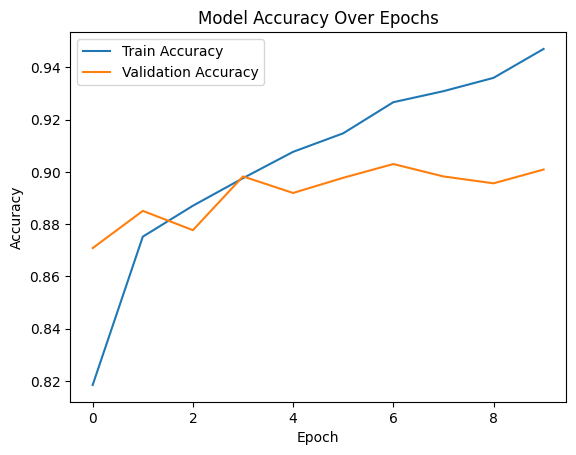

In [8]:
# 7. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

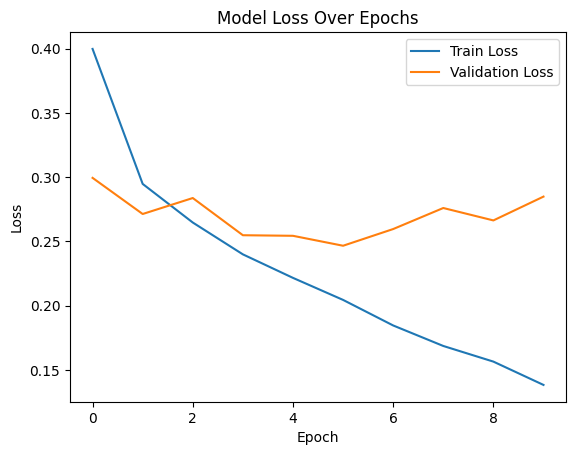

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
# 8. Evaluate model
print("Evaluating model...")
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

Evaluating model...
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8914 - loss: 0.3056

Test Accuracy: 89.56%


Generating confusion matrix...
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


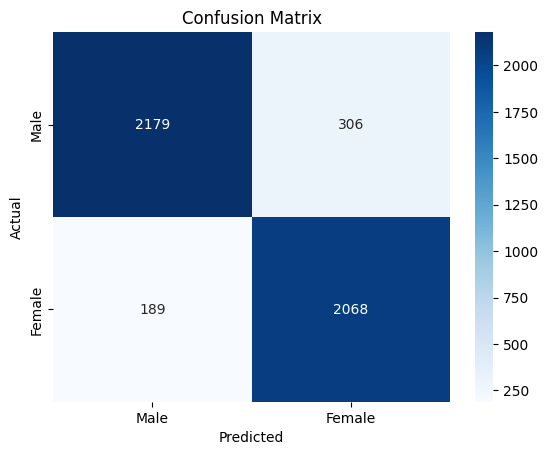

In [11]:
# 9. Confusion matrix
print("Generating confusion matrix...")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Showing misclassified images...


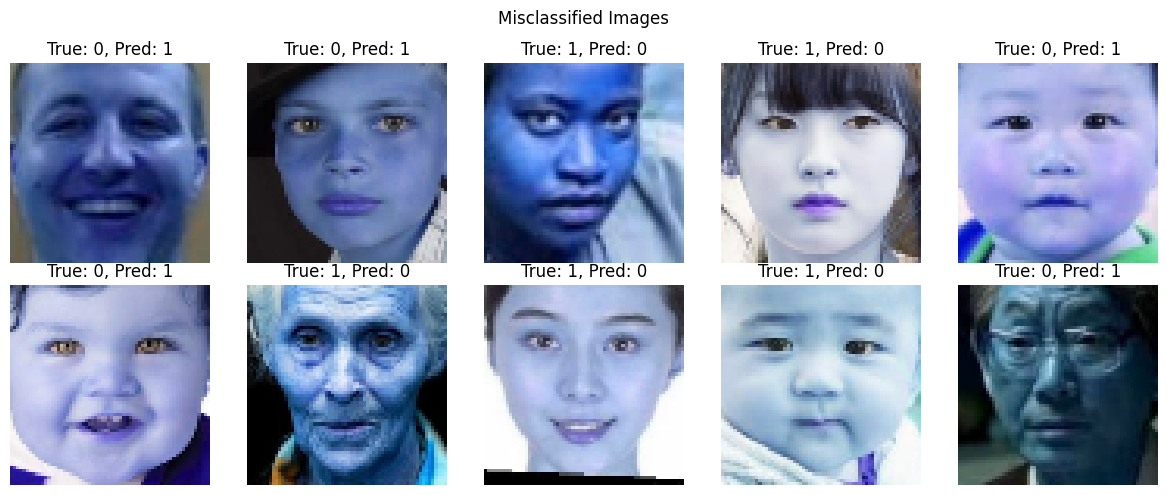

In [12]:
# 10. Show misclassified examples
print("Showing misclassified images...")
wrong_idx = np.where(y_pred_classes != y_true)[0]
if len(wrong_idx) >= 10:
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        idx = wrong_idx[i]
        ax.imshow(X_test[idx])
        ax.set_title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis('off')
    plt.suptitle("Misclassified Images")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough misclassified samples to display.")

In [ ]:
# Save the trained model
# model.save("gender_classifier_model.h5")
print("Model saved as gender_classifier_model.h5")